# 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

# 2) Import Data

In [2]:
amazon_data = pd.read_csv("Amazon_Unlocked_Mobile.csv")

In [3]:
amazon_data = amazon_data.dropna(axis = 0)

In [4]:
amazon_data.shape

(334335, 6)

In [5]:
amazon_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [6]:
amazon_data=amazon_data[["Reviews","Rating"]]

In [7]:
amazon_data.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4


In [8]:
amazon_data_pos=amazon_data[amazon_data["Rating"].isin([4,5])]

In [9]:
amazon_data_pos.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4


In [10]:
amazon_data_pos.tail()

,Reviews,Rating
413830,LOVE IT,5
413832,good rugged phone that has a long-lasting batt...,4
413835,another great deal great price,5
413837,Passes every drop test onto porcelain tile!,5
413839,Only downside is that apparently Verizon no lo...,4


In [11]:
amazon_data_neg=amazon_data[amazon_data["Rating"].isin([1,2])]

In [12]:
amazon_data_neg.head()

,Reviews,Rating
5,I already had a phone with problems... I know ...,1
6,The charging port was loose. I got that solder...,2
7,"Phone looks good but wouldn't stay charged, ha...",2
13,I'm really disappointed about my phone and ser...,1
15,Had this phone before and loved it but was not...,2


In [13]:
amazon_data_neg.tail()

,Reviews,Rating
413817,This is the second junk Convoy I have owned. T...,1
413820,They said phone was normal wear but it was a l...,1
413828,Would not work,1
413831,"Item was listed as new, but was not. When we t...",1
413834,used hard,1


In [14]:
amazon_data.Rating.value_counts()

5    180253
1     57535
4     50421
3     26058
2     20068
Name: Rating, dtype: int64

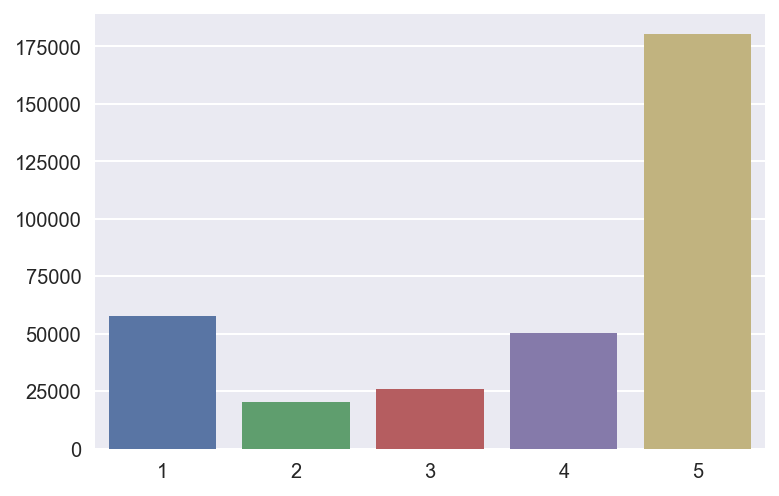

In [15]:
sns.barplot(x=amazon_data.Rating.value_counts().index,y=amazon_data.Rating.value_counts().values)

In [16]:
amazon_data_filtered=pd.concat([amazon_data_pos[:20000],amazon_data_neg[:20000]])

In [17]:
amazon_data_filtered.shape

(40000, 2)

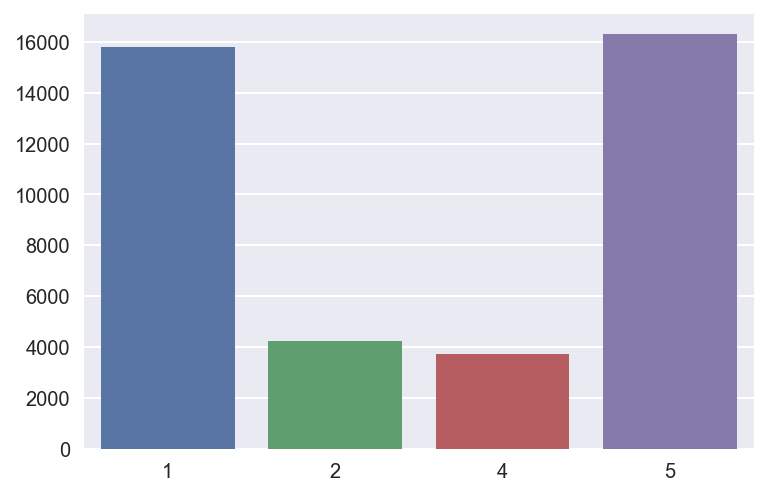

In [18]:
sns.barplot(x=amazon_data_filtered.Rating.value_counts().index,y=amazon_data_filtered.Rating.value_counts().values)

In [19]:
amazon_data_filtered["r"]=1

In [20]:
amazon_data_filtered["r"][amazon_data_filtered["Rating"].isin([1,2])]= 0

In [21]:
amazon_data_filtered.head()

,Reviews,Rating,r
0,I feel so LUCKY to have found this used (phone...,5,1
1,"nice phone, nice up grade from my pantach revu...",4,1
2,Very pleased,5,1
3,It works good but it goes slow sometimes but i...,4,1
4,Great phone to replace my lost phone. The only...,4,1


In [22]:
amazon_data_filtered.tail()

,Reviews,Rating,r
109307,"Phone does not work, no one can hear me talkin...",1,0
109308,"A little disappointing, doesn't have any memor...",2,0
109310,poor volume very hard to hear,1,0
109313,"I received the phone with damaged screen , I r...",1,0
109316,It was slow not what i expected small screen o...,1,0


In [23]:
amazon_data_filtered.r.value_counts()

1    20000
0    20000
Name: r, dtype: int64

# 3)Spilt Train And Test data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train_data,x_test_data,Y_train_data,y_test_data=train_test_split(amazon_data_filtered["Reviews"],amazon_data_filtered["r"],test_size=0.2)

In [26]:
Y_train_data.head()

23096    1
88129    0
36756    1
8799     0
29169    1
Name: r, dtype: int64

In [27]:
X_train_data.head()

23096    I used to have iPhone4 16GB I decided to upgra...
88129    Compre un celular usado en amazon y me llego c...
36756    I expected the phone to have scuffs and scratc...
8799     Camera looks like I was standing in a cloud of...
29169                                               Great.
Name: Reviews, dtype: object

# 4) Text Transformation


In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [30]:
tfidf_vector = TfidfVectorizer(stop_words="english")

In [31]:
tfidf_vector.fit(X_train_data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [32]:
print(tfidf_vector.get_feature_names()[0:20])
print(tfidf_vector.get_feature_names()[-20:])

['00', '000', '0000', '000mah', '002', '00now', '00pm', '01', '013435003182980', '014', '018633051660f', '02', '03', '04', '04th', '06', '07', '0780', '08', '0804245']
['zf2', 'zip', 'ziploc', 'ziplock', 'zippy', 'zips', 'zmax', 'zone', 'zones', 'zoom', 'zooming', 'zte', 'ítem', 'óptico', 'ünlocked', 'śo', '中国要用卡贴', '买来三天就被偷了not', '支持联通移动2g', '还不错']


In [33]:
X_train_data_new=tfidf_vector.transform(X_train_data)

In [34]:
X_train_data_new.shape

(32000, 15616)

In [35]:
x_test_data_new=tfidf_vector.transform(x_test_data)

# 6) Models

# 6.1) Logistic Regression

In [36]:
predictions = dict()

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr_model = LogisticRegression()

In [39]:
lr_model.fit(X_train_data_new,Y_train_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
predictions["LogisticRegression"] = lr_model.predict(x_test_data_new)

In [41]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [42]:
accuracy_score(y_test_data,predictions["LogisticRegression"])

0.94474999999999998

# 6.2) SVM


In [47]:
from sklearn.svm import SVC

In [48]:
 svm_model = SVC()

In [49]:
svm_model.fit(X_train_data_new,Y_train_data) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
predictions["SVM"]=svm_model.predict(x_test_data_new)

In [51]:
accuracy_score(y_test_data,predictions["SVM"])

0.49162499999999998

# 6.3) Naive Bayers

In [47]:
# 1) Multinomial

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
mul_model = MultinomialNB()

In [54]:
mul_model.fit(X_train_data_new,Y_train_data)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
predictions["Multinomial"] = mul_model.predict(x_test_data_new)

In [56]:
accuracy_score(y_test_data, predictions["Multinomial"])

0.93474999999999997

In [57]:
# 2)BernoulliNB

In [58]:
from sklearn.naive_bayes import BernoulliNB

In [59]:
ber_model = BernoulliNB()

In [60]:
ber_model.fit(X_train_data_new,Y_train_data)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [61]:
predictions["BernoulliNB"]=ber_model.predict(x_test_data_new)

In [62]:
accuracy_score(y_test_data,predictions["BernoulliNB"])

0.81162500000000004

# 6.4) k -NN classifier

In [74]:

from sklearn.neighbors import KNeighborsClassifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_data_new,Y_train_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [76]:
predictions["knn"] = knn_model.predict(x_test_data_new)

In [77]:
accuracy_score(y_test_data,predictions["knn"])

0.81374999999999997

# 6.5)Ensemble classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
ess_model = RandomForestClassifier()
ess_model.fit(X_train_data_new,Y_train_data)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [65]:
predictions["EssembleClasification"] = ess_model.predict(x_test_data_new)

In [66]:
predictions["EssembleClasification"] 

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [67]:

from sklearn.metrics import roc_curve, auc

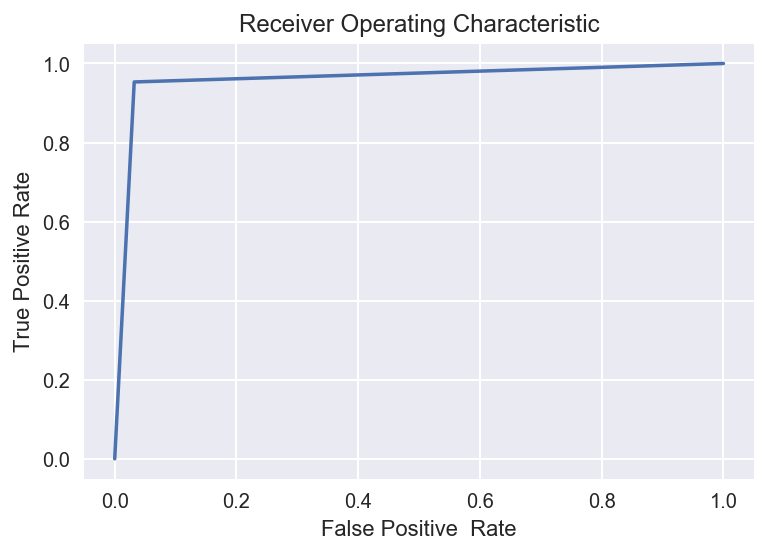

In [68]:

from sklearn.metrics import roc_curve, auc
false_positive, true_positive,_= roc_curve(y_test_data,predictions["EssembleClasification"])
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive, true_positive)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive  Rate')
plt.show()

In [69]:
accuracy_score(y_test_data,predictions["EssembleClasification"])

0.96050000000000002

# 6.6) Decision Tree

In [70]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()

In [71]:
tree_model.fit(X_train_data_new,Y_train_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [72]:
predictions["DecisionTree"] = tree_model.predict(x_test_data_new)

In [73]:
accuracy_score(y_test_data,predictions["DecisionTree"])

0.94550000000000001

# 7) Tunning

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
krange = np.arange(1,20)

In [80]:
grid_param = dict(n_neighbors=krange)
print(grid_param)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}


In [81]:
model = KNeighborsClassifier()
knn_grid = GridSearchCV(model,grid_param)
knn_grid.fit(X_train_data_new,Y_train_data)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [82]:

knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [83]:

knn_grid.best_params_

{'n_neighbors': 1}

In [84]:
knn_grid.grid_scores_

C:\Users\Shreya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.88172, std: 0.02193, params: {'n_neighbors': 1},
 mean: 0.84762, std: 0.00149, params: {'n_neighbors': 2},
 mean: 0.82494, std: 0.03203, params: {'n_neighbors': 3},
 mean: 0.81731, std: 0.00413, params: {'n_neighbors': 4},
 mean: 0.77706, std: 0.00855, params: {'n_neighbors': 5},
 mean: 0.78656, std: 0.00949, params: {'n_neighbors': 6},
 mean: 0.74013, std: 0.01100, params: {'n_neighbors': 7},
 mean: 0.75156, std: 0.01215, params: {'n_neighbors': 8},
 mean: 0.70909, std: 0.01438, params: {'n_neighbors': 9},
 mean: 0.72013, std: 0.01635, params: {'n_neighbors': 10},
 mean: 0.67853, std: 0.01553, params: {'n_neighbors': 11},
 mean: 0.68997, std: 0.01804, params: {'n_neighbors': 12},
 mean: 0.65159, std: 0.01780, params: {'n_neighbors': 13},
 mean: 0.66209, std: 0.01931, params: {'n_neighbors': 14},
 mean: 0.63050, std: 0.01934, params: {'n_neighbors': 15},
 mean: 0.64156, std: 0.02071, params: {'n_neighbors': 16},
 mean: 0.60925, std: 0.01731, params: {'n_neighbors': 17},
 mean:

In [86]:
knn_grid.best_score_

0.88171875

In [87]:
print_result = {}

In [88]:
for val in knn_grid.grid_scores_:
    v = val[0]
    sc = val[1]
    for k,va in v.items():
        print_result[va] = sc
        

C:\Users\Shreya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [89]:
print_result

{1: 0.88171875,
 2: 0.84762499999999996,
 3: 0.82493749999999999,
 4: 0.8173125,
 5: 0.77706249999999999,
 6: 0.78656250000000005,
 7: 0.74012500000000003,
 8: 0.75156250000000002,
 9: 0.70909374999999997,
 10: 0.72012500000000002,
 11: 0.67853125000000003,
 12: 0.68996875000000002,
 13: 0.65159374999999997,
 14: 0.66209375000000004,
 15: 0.63049999999999995,
 16: 0.64156250000000004,
 17: 0.60924999999999996,
 18: 0.61737500000000001,
 19: 0.59534374999999995}

In [90]:
x=[]
y=[]

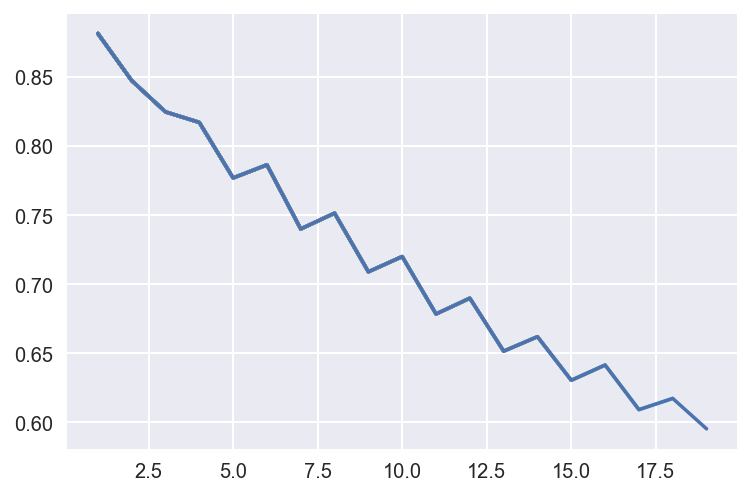

In [93]:
for k,v in print_result.items():
    x.append(k)
    y.append(v)
    plt.plot(x,y)

In [92]:
v = knn_grid.grid_scores_[0][0]
for k,va in v.items():
    print (va)
    

1


C:\Users\Shreya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


# 8) Evaluation

In [94]:
print(classification_report(y_test_data, predictions['EssembleClasification'], target_names = ["Good", "Bad"]))

             precision    recall  f1-score   support

       Good       0.95      0.97      0.96      3933
        Bad       0.97      0.95      0.96      4067

avg / total       0.96      0.96      0.96      8000



In [95]:
matrix = confusion_matrix(y_test_data, predictions['EssembleClasification'])
matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

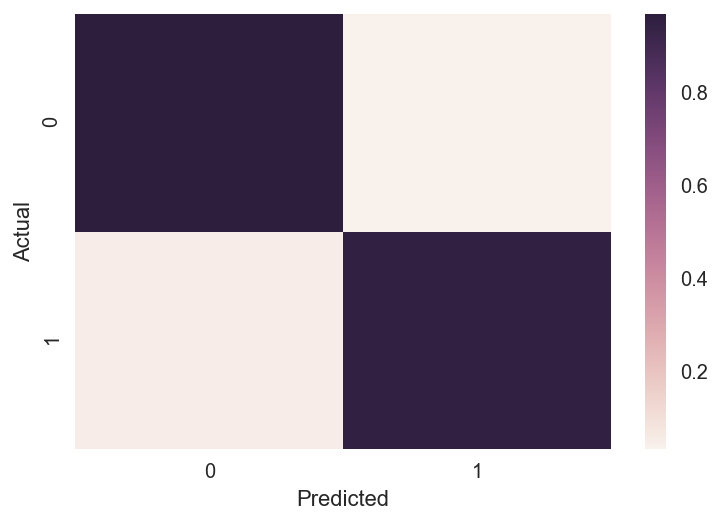

In [96]:
sns.heatmap(matrix_normalized)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [97]:
predictions

{'BernoulliNB': array([1, 0, 1, ..., 1, 0, 1], dtype=int64),
 'DecisionTree': array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 'EssembleClasification': array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 'LogisticRegression': array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 'Multinomial': array([1, 0, 0, ..., 1, 0, 1], dtype=int64),
 'SVM': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'knn': array([0, 1, 1, ..., 1, 0, 1], dtype=int64)}

In [98]:
print_results = {}
for k,v in predictions.items():
    print_results[k] = accuracy_score(y_test_data,v)

In [99]:
print_results

{'BernoulliNB': 0.81162500000000004,
 'DecisionTree': 0.94550000000000001,
 'EssembleClasification': 0.96050000000000002,
 'LogisticRegression': 0.94474999999999998,
 'Multinomial': 0.93474999999999997,
 'SVM': 0.49162499999999998,
 'knn': 0.81374999999999997}

In [100]:
result_table=pd.DataFrame(list(print_results.items()), columns=["Model","Accuracy"])

In [101]:
result_table

,Model,Accuracy
0,LogisticRegression,0.944750
1,SVM,0.491625
2,Multinomial,0.934750
3,BernoulliNB,0.811625
4,EssembleClasification,0.960500
5,DecisionTree,0.945500
6,knn,0.813750


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

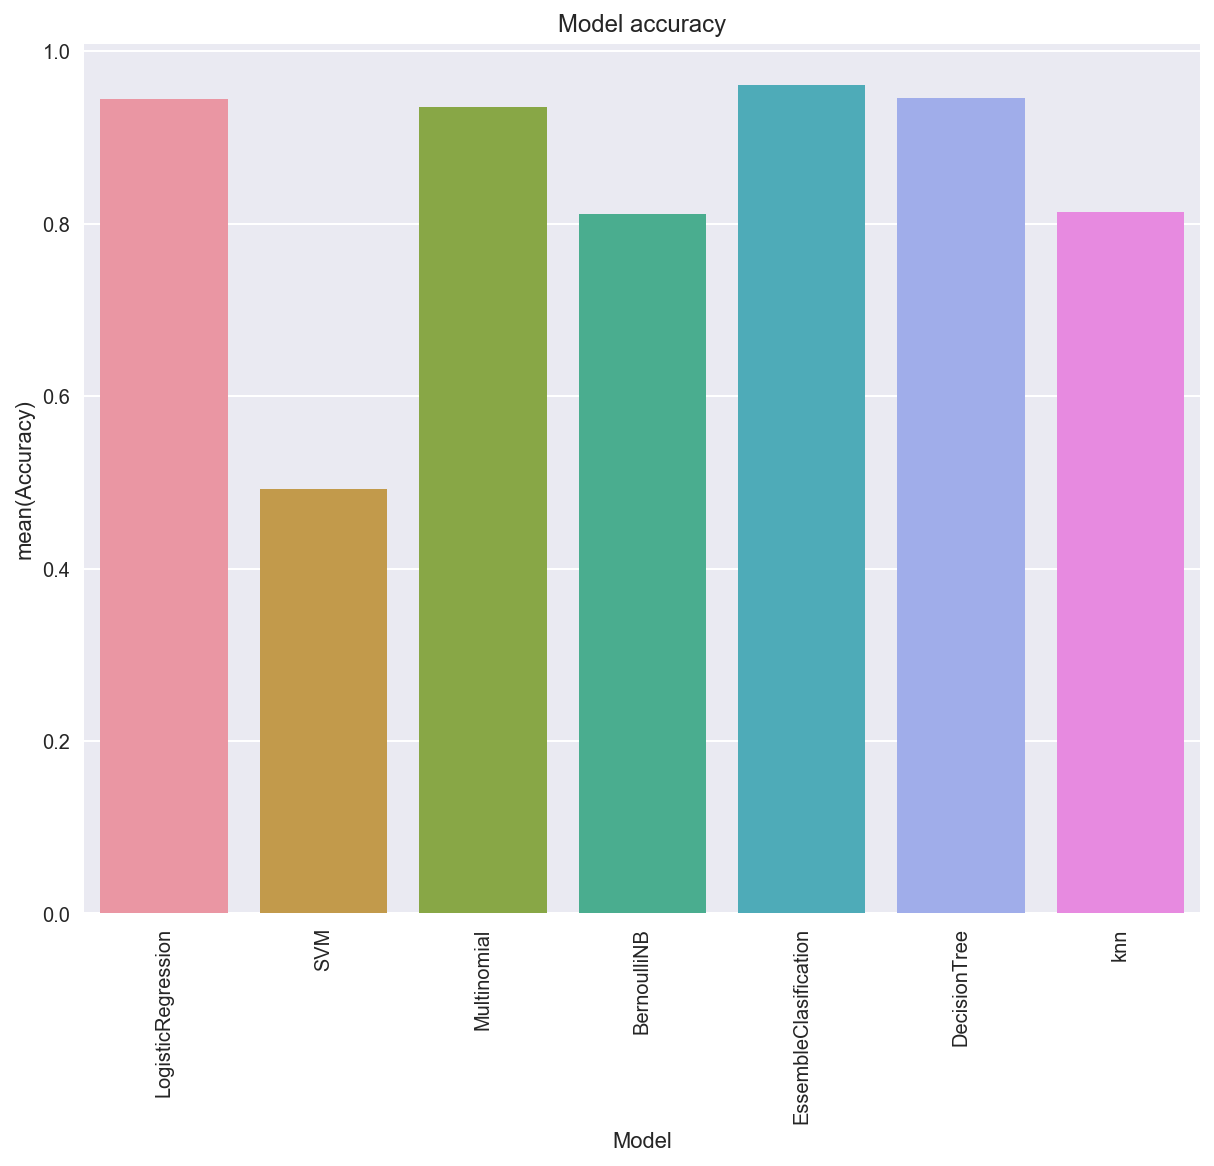

In [102]:
plt.figure(figsize= (10,8))
sns.barplot(x = "Model", y = "Accuracy", data = result_table)
plt.title("Model accuracy")
plt.xticks(rotation = 90)